# 用KNN算法完成分类任务

In [1]:
import matplotlib.pyplot as plt
import numpy as np

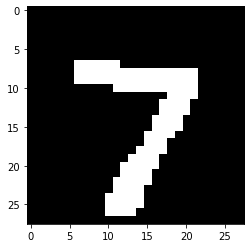

In [8]:
# 读取数据集
m_x = np.loadtxt('data/mnist_x')
m_y = np.loadtxt('data/mnist_y')

# 数据可视化
data = np.reshape(np.array(m_x[0],dtype=int),[28,28])
plt.figure()
plt.imshow(data,cmap='gray')

In [9]:
# 将数据集分为训练集和测试集
ratio = 0.8
split = int(len(m_x) * ratio)

# 打乱数据
np.random.seed(2023)
idx = np.random.permutation(np.arange(len(m_x)))
m_x = m_x[idx]
m_y = m_y[idx]
x_train,x_test = m_x[:split],m_x[split:]
y_train,y_test = m_y[:split],m_y[split:]

In [10]:
# 定义样本之间的距离
# 欧式距离
def distance(a,b):
    return np.sqrt(np.sum(np.square(a - b)))

In [12]:
# KNN算法类
class KNN:
    def __init__(self,k,label_num):
        # 设置k，标签数量
        self.k = k
        self.label_num = label_num

    def fit(self,x_train,y_train):
        # 在类中保存训练数据
        self.x_train = x_train
        self.y_train = y_train

    def get_knn_indices(self,x):
        # 获取距离目标最近的K个样本点的下标
        # 计算已知样本到目标样本的距离
        dis = list(map(lambda a:distance(a,x),self.x_train))
        # 按距离从小到大排序，获得对应下标
        knn_indices = np.argsort(dis)
        # 取最近的k个下标
        knn_indices = knn_indices[:self.k]
        return knn_indices
    
    def get_label(self,x):
        # KNN方法的具体实现，观察k个近邻并获取数量最多的类别
        knn_indices = self.get_knn_indices(x)
        # 类别计数
        label_statistic = np.zeros(shape=[self.label_num])
        for index in knn_indices:
            label = int(self.y_train[index])
            label_statistic[label] += 1
        # 返回数量最多的类型
        return np.argmax(label_statistic)
    
    def predict(self,x_test):
        # 预测样本x_test的类别
        predicted_test_labels = np.zeros(shape=[len(x_test)],dtype=int)
        for i,x in enumerate(x_test):
            predicted_test_labels[i] = self.get_label(x)
        return predicted_test_labels


In [16]:
# 在测试集上观察算法的效果
for k in range(1,10):
    knn = KNN(k,label_num=10)
    knn.fit(x_train,y_train)
    predicted_labels = knn.predict(x_test)
    accuracy = np.mean(predicted_labels == y_test)
    print(f'K的取值为{k},预测准确率为{accuracy * 100:.1f}%')

K的取值为1,预测准确率为88.5%
K的取值为2,预测准确率为86.5%
K的取值为3,预测准确率为87.5%
K的取值为4,预测准确率为86.0%
K的取值为5,预测准确率为87.0%
K的取值为6,预测准确率为86.5%
K的取值为7,预测准确率为86.5%
K的取值为8,预测准确率为86.5%
K的取值为9,预测准确率为86.0%
